In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import tqdm
import time
from datetime import datetime
import copy
import random

In [58]:
# average after 3 runs
avg_rs = 1.1
avg_rmhc = 0.2
avg_rrhc =0.2
avg_ea_div = 1.3


rs = "2021-10-21-09-17_rs_e50000"
rmhc = "2021-10-23-17-11_rmhc_e50000"
rrhc = "2021-10-23-16-56_rshc_e50000"

# ga = "202110051047_ga_no_m_plot.csv"
ea_div = "2021-10-23-14-26_ea_div_e500"
# ea_div_m = "2021-10-23-19-26_ea_div_mut_e50000"
ea_div_m = "/Users/dxx0511a/Desktop/Columbia/MECS_4510_EA/hw2/output/2021-10-25_0.17/tmp/ea_dm_curve"

rs_data = pd.read_csv(f'{rs}_plot.csv')
rmhc_data = pd.read_csv(f'{rmhc}_plot.csv')
rrhc_data = pd.read_csv(f'{rrhc}_plot.csv')


ea_div_data = pd.read_csv(f"{ea_div}_plot.csv")
# ea_div_m_data = pd.read_csv(f"{ea_div_m}_plot.csv")
ea_div_m_data = pd.read_csv(f"{ea_div_m}.txt", sep=', ',names=['evaluation', 'mse'],engine='python')
ea_div_m_data


ea_div_m_data.at[76, "evaluation"] = 50000
rrhc_data.at[11, "evaluation"] = 50000
rmhc_data.at[7, "evaluation"] = 50000
ea_div_data.at[12, 'evaluation'] = 50000

ea_div_m_data.at[76, "mse"] = 0.174174
rrhc_data.at[11, "mse"] = 3.816646
rmhc_data.at[7, "mse"] = 18.285400
ea_div_data.at[12, "mse"] = 4.664359

rs_data['covergence_percent'] = (1/(rs_data.mse / (0.174174)))*100
rmhc_data['covergence_percent'] = (1/(rmhc_data.mse / (0.174174)))*100
rrhc_data['covergence_percent'] = (1/(rrhc_data.mse / (0.174174)))*100
ea_div_data['covergence_percent'] = (1/(ea_div_data.mse / (0.174174)))*100
ea_div_m_data['covergence_percent'] = (1/(ea_div_m_data.mse / (0.174174)))*100
rmhc_data

,evaluation,mse,covergence_percent
0,0.0,25.475636,0.683689
1,943.0,23.462356,0.742355
2,3639.0,21.435716,0.812541
3,7559.0,20.407981,0.853460
4,11456.0,19.195492,0.907369
5,16721.0,18.470538,0.942983
6,18514.0,18.285400,0.952530
7,50000.0,18.285400,0.952530


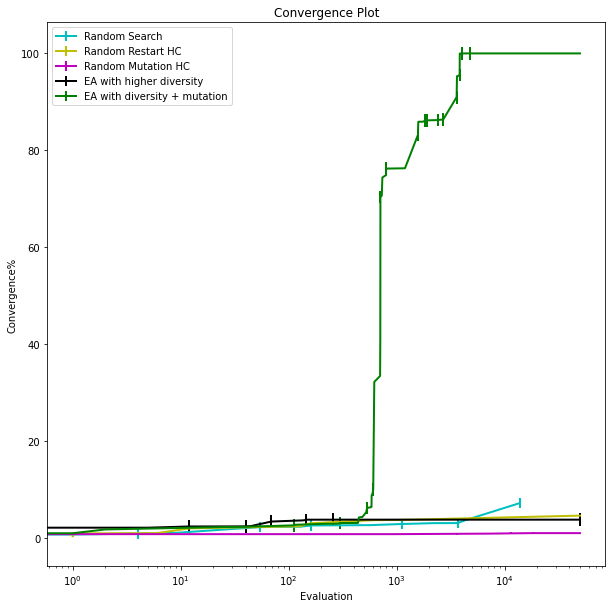

In [59]:
plt.figure(figsize=(10,10))

plt.errorbar(rs_data['evaluation'], rs_data["covergence_percent"],label='Random Search', color='c',linewidth=2, yerr=avg_rs, errorevery=2)
plt.errorbar(rrhc_data['evaluation'], rrhc_data['covergence_percent'], label='Random Restart HC', color='y',linewidth=2,yerr=avg_rrhc, errorevery=3) ###
plt.errorbar(rmhc_data['evaluation'], rmhc_data['covergence_percent'], label='Random Mutation HC', color='m',linewidth=2,yerr=avg_rmhc, errorevery=2) ###
plt.errorbar(ea_div_data['evaluation'], ea_div_data['covergence_percent'], label='EA with higher diversity', color='k',linewidth=2,yerr=avg_ea_div, errorevery=2)
plt.errorbar(ea_div_m_data['evaluation'], ea_div_m_data['covergence_percent'], label='EA with diversity + mutation', color='g',linewidth=2,yerr=avg_ea_div, errorevery=5)
plt.xscale('log')
plt.legend()
plt.xlabel("Evaluation")
plt.ylabel("Convergence%")
plt.title("Convergence Plot");

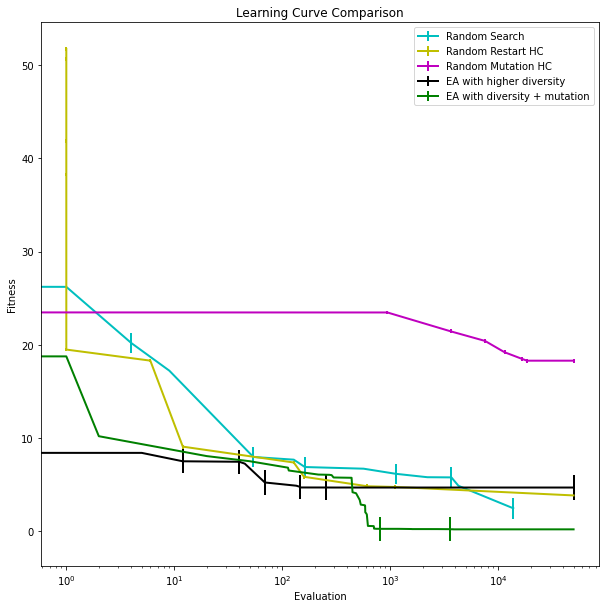

In [60]:
plt.figure(figsize=(10,10))

# plt.xscale('log')



plt.errorbar(rs_data['evaluation'], rs_data["mse"],label='Random Search', color='c',linewidth=2, yerr=avg_rs, errorevery=2)
plt.errorbar(rrhc_data['evaluation'], rrhc_data['mse'], label='Random Restart HC', color='y',linewidth=2,yerr=avg_rrhc, errorevery=1) ###
plt.errorbar(rmhc_data['evaluation'], rmhc_data['mse'], label='Random Mutation HC', color='m',linewidth=2,yerr=avg_rmhc, errorevery=1) ###
plt.errorbar(ea_div_data['evaluation'], ea_div_data['mse'], label='EA with higher diversity', color='k',linewidth=2,yerr=avg_ea_div, errorevery=2)
plt.errorbar(ea_div_m_data['evaluation'], ea_div_m_data['mse'], label='EA with diversity + mutation', color='g',linewidth=2,yerr=avg_ea_div, errorevery=30)
# plt.ylim(0, 10)
plt.xscale('log')
plt.legend()
plt.xlabel("Evaluation")
plt.ylabel("Fitness")
plt.title("Learning Curve Comparison");

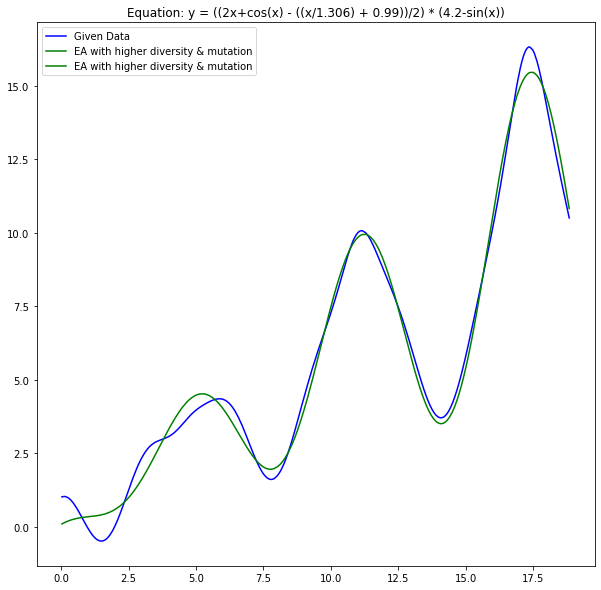

In [64]:
rs_graph = pd.read_csv(f"{rs}_graph.csv")
rmhc_graph = pd.read_csv(f"{rmhc}_graph.csv")
rrhc_graph = pd.read_csv(f"{rrhc}_graph.csv")
ea_div_graph = pd.read_csv(f"{ea_div}_graph.csv")

ea_div_m_graph = pd.read_csv("/Users/dxx0511a/Desktop/Columbia/MECS_4510_EA/hw2/output/2021-10-25_0.17/tmp/ea_dm_yhat.txt",sep=', ',names=['evaluation', 'mse'],engine='python')

data = "data.txt"
df = pd.read_csv(f'{data}', header = None, sep=", ", names=["x", 'y'], engine='python')
x_s = df["x"].to_numpy()
y_s = df["y"].to_numpy()

plt.figure(figsize=(10,10))
plt.plot(x_s, y_s,color='blue', label="Given Data");
# plt.plot(x_s, rs_graph,color='c', label="Random Search");
# plt.plot(x_s, rmhc_graph,color='y', label="Random Mutation Hill Climber");
# plt.plot(x_s, rrhc_graph,color='m', label="Random Restart Hill Climber");
# plt.plot(x_s, ea_div_graph,color='k', label="EA with higher diversity");
plt.plot(x_s, ea_div_m_graph,color='g', label="EA with higher diversity & mutation");
plt.title("Equation: y = ((2x+cos(x) - ((x/1.306) + 0.99))/2) * (4.2-sin(x))")
plt.legend()